In [ ]:
import random
import seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

## 3.2. An analysis about the Iris Flower Dataset


In [ ]:
import pandas
dataset = pandas.read_csv('/content/digits.csv')

In [ ]:
dataset.head()

,label,0x0,0x1,0x2,0x3,0x4,0x5,0x6,0x7,0x8,...,13x4,13x5,13x6,13x7,13x8,13x9,13x10,13x11,13x12,13x13
0,7,0,0,0,0,0,0,0,0,0,...,0,0,41,88,3,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
x=dataset.drop(columns=['label'])
y=dataset['label']

In [ ]:
scaler = MinMaxScaler()
dataX = scaler.fit_transform(x)

In [ ]:
data=pd.DataFrame(dataX)
data['Class Name']=y

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,187,188,189,190,191,192,193,194,195,Class Name
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.176724,0.349206,0.013453,0.0,0.0,0.0,0.0,0.0,7
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,3
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,8
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,9
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,3


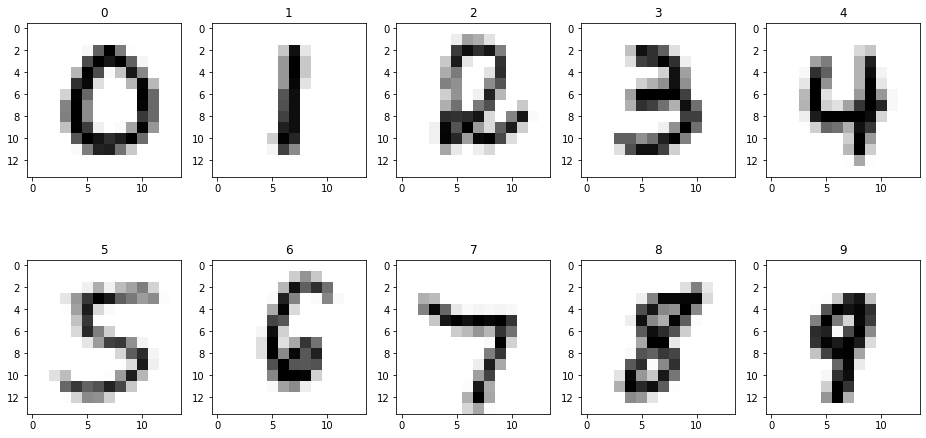

In [ ]:
fig = plt.figure(figsize=(16,8))

for i in range(10):
    for j in range(y.shape[0]):
        if y[j] == i:
            ax = fig.add_subplot(2, 5, i+1)
            ax.imshow(x.values[j].reshape(14, 14), cmap=plt.cm.gray_r)
            ax.set_title(str(i))
            break

In [ ]:
import time

In [ ]:
from sklearn import metrics
from sklearn import model_selection
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def kfold_training_testing(data, model):
  feature = data.iloc[:, 1:]
  target = data['Class Name']
  fold = model_selection.KFold(n_splits=5)
  f1score, precision, recall, time = [], [], [], []
  for training, testing in fold.split(feature):   
      X_train, X_test = feature.iloc[training], feature.iloc[testing]
      y_train, y_test = target.iloc[training], target.iloc[testing]
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      f1score += [metrics.f1_score(y_test, y_pred, average="macro")]
      precision += [metrics.precision_score(y_test, y_pred, average="macro")]
      recall += [metrics.recall_score(y_test, y_pred, average="macro")]
      print("precision--{} , recall--{},f1score--{}".format(np.mean(precision),
            np.mean(recall),
            np.mean(f1score))) 
  return {'precision':np.mean(precision), 'recall':np.mean(recall),'f1score':np.mean(f1score)}

In [ ]:
def training(hidden_layer, nodes, activation_layer, data):
  results = []
  hidden_layer_len=[hidden_layer]*nodes
  model = MLPClassifier(activation=activation_layer, 
                        hidden_layer_sizes=hidden_layer_len, 
                        max_iter=1000, solver='lbfgs')
  evalute_model = kfold_training_testing(data, model)
  results += [evalute_model]
  return results

#Hidden layer--20, and Nodes ==2

In [ ]:
hidden_layer=20
nodes=2
activation_layer=['tanh', 'relu']
start = time.time()
dataframe_2_20={}
for i in activation_layer:
  print('******************************Started--{}*****************************'.format(i))
  dataframe_2_20[i]=pd.DataFrame(training(hidden_layer, nodes, i, data))
  time_spent = time.time() - start
  dataframe_2_20['time_spent_'+str(i)]=time_spent
  print('******************************Finished--{}*****************************'.format(i))

******************************Started--tanh*****************************
precision--0.9777642737761376 , recall--0.9771272839025471,f1score--0.9773783895360957
precision--0.9839116432229642 , recall--0.983608258745608,f1score--0.9837139438021053
precision--0.9853282665992742 , recall--0.9850123234370617,f1score--0.9851235418582861
precision--0.9837309758480455 , recall--0.983513493163471,f1score--0.9835705994445862
precision--0.9834527825595932 , recall--0.9832962200773094,f1score--0.9833188079945152
******************************Finished--tanh*****************************
******************************Started--relu*****************************
precision--0.9984615384615385 , recall--0.9983216783216783,f1score--0.9983880478401026
precision--0.9975758537533732 , recall--0.9975394121153827,f1score--0.9975526534311048
precision--0.9974865065068136 , recall--0.9974854836766468,f1score--0.9974813633252175
precision--0.9966990553600674 , recall--0.9966494651939711,f1score--0.996664979029535


In [ ]:
dataframe_2_20

{'tanh':    precision    recall   f1score
 0   0.983453  0.983296  0.983319,
 'time_spent_tanh': 23.51519203186035,
 'relu':    precision    recall  f1score
 0   0.996514  0.996506   0.9965,
 'time_spent_relu': 58.094019651412964}

#Hidden layer--100, and Nodes ==2

In [ ]:
hidden_layer=100
nodes=2
activation_layer=['tanh', 'relu']
start = time.time()
dataframe_2_100={}
for i in activation_layer:
  print('******************************Started--{}*****************************'.format(i))
  dataframe_2_100[i]=pd.DataFrame(training(hidden_layer, nodes, i, data))
  time_spent = time.time() - start
  dataframe_2_100['time_spent_'+str(i)]=time_spent
  print('******************************Finished--{}*****************************'.format(i))

******************************Started--tanh*****************************
precision--0.9887691237321471 , recall--0.9885312968123889,f1score--0.9885743439706618
precision--0.989465855744743 , recall--0.9892721990674388,f1score--0.9893084755307192
precision--0.9894574217969582 , recall--0.9894363275578408,f1score--0.9893957457937274
precision--0.9887965260533329 , recall--0.9887072217839596,f1score--0.9886885292133905
precision--0.9871226545034123 , recall--0.9871350141661323,f1score--0.9870635647199244
******************************Finished--tanh*****************************
******************************Started--relu*****************************
precision--0.9934711202702443 , recall--0.9934533341055081,f1score--0.9934345782501193
precision--0.9925227301894795 , recall--0.9925680528998542,f1score--0.9925176304986539
precision--0.9915982471490855 , recall--0.9916880808817913,f1score--0.9916105592864936
precision--0.9914153247891606 , recall--0.9913848629310515,f1score--0.991369589444635

In [ ]:
dataframe_2_100

{'tanh':    precision    recall   f1score
 0   0.987123  0.987135  0.987064,
 'time_spent_tanh': 41.71464133262634,
 'relu':    precision    recall   f1score
 0   0.991408  0.991466  0.991407,
 'time_spent_relu': 122.23544883728027}

#Hidden layer--20, and Nodes ==5

In [ ]:
hidden_layer=20
nodes=5
activation_layer=['tanh', 'relu']
start = time.time()
dataframe_5_20={}
for i in activation_layer:
  print('******************************Started--{}*****************************'.format(i))
  dataframe_5_20[i]=pd.DataFrame(training(hidden_layer, nodes, i, data))
  time_spent = time.time() - start
  dataframe_5_20['time_spent_'+str(i)]=time_spent
  print('******************************Finished--{}*****************************'.format(i))

******************************Started--tanh*****************************
precision--0.9821553685204801 , recall--0.9821938363849385,f1score--0.9821289563219265
precision--0.9851183848130822 , recall--0.985372301227297,f1score--0.9851707662506102
precision--0.9823260684561327 , recall--0.9825938291933629,f1score--0.982401401663853
precision--0.9827225513075843 , recall--0.9830258899322604,f1score--0.9828201266742695
precision--0.9827375438774615 , recall--0.9830461912351562,f1score--0.9828360244254982
******************************Finished--tanh*****************************
******************************Started--relu*****************************
precision--1.0 , recall--1.0,f1score--1.0
precision--0.9992537313432835 , recall--0.9990781648258283,f1score--0.9991610078640554
precision--0.9995024875621891 , recall--0.999385443217219,f1score--0.9994406719093702
precision--0.9996268656716418 , recall--0.9995390824129142,f1score--0.9995805039320277
precision--0.999362509486466 , recall--0.9993

In [ ]:
dataframe_5_20

{'tanh':    precision    recall   f1score
 0   0.982738  0.983046  0.982836,
 'time_spent_tanh': 72.22561430931091,
 'relu':    precision    recall   f1score
 0   0.999363  0.999322  0.999338,
 'time_spent_relu': 196.66725826263428}

#Hidden layer--100, and Nodes ==5

In [ ]:
hidden_layer=100
nodes=5
activation_layer=['tanh', 'relu']
start = time.time()
dataframe_5_100={}
for i in activation_layer:
  print('******************************Started--{}*****************************'.format(i))
  dataframe_5_100[i]=pd.DataFrame(training(hidden_layer, nodes, i, data))
  time_spent = time.time() - start
  dataframe_5_100['time_spent_'+str(i)]=time_spent
  print('******************************Finished--{}*****************************'.format(i))

******************************Started--tanh*****************************
precision--0.9945679122374903 , recall--0.9943112443112444,f1score--0.9943989630473361
precision--0.9944054193078616 , recall--0.9942899550809587,f1score--0.9943023661741064
precision--0.9933363381344837 , recall--0.9933646599497714,f1score--0.9933022123419932
precision--0.9942343974552215 , recall--0.9941623481929661,f1score--0.9941535123544283
precision--0.9938101547219362 , recall--0.993874471885146,f1score--0.9937976949279502
******************************Finished--tanh*****************************
******************************Started--relu*****************************
precision--1.0 , recall--1.0,f1score--1.0
precision--1.0 , recall--1.0,f1score--1.0
precision--0.9996913580246914 , recall--0.9997175141242938,f1score--0.9997031172686789
precision--0.9995584344849051 , recall--0.9995848835607,f1score--0.9995698119031151
precision--0.9994269673681438 , recall--0.9994755991562523,f1score--0.999448733927435
*****

In [ ]:
dataframe_5_100

{'tanh':    precision    recall   f1score
 0    0.99381  0.993874  0.993798,
 'time_spent_tanh': 117.20413136482239,
 'relu':    precision    recall   f1score
 0   0.999427  0.999476  0.999449,
 'time_spent_relu': 610.4008371829987}

# Number of layers = 2 and size of layers = [20, 40, 60, 80, 100])

In [ ]:
hidden_layer = 2
time2=[]
dataframe_100={}
for n_nodes in [20,40,60,80,100]:
    activation_layer=['tanh', 'relu']
    start = time.time()
    for i in activation_layer:
      print('******************************Started--{}*****************************'.format(i))
      dataframe_100[i]=pd.DataFrame(training(hidden_layer, int(n_nodes), str(i), data))
      time_spent = time.time() - start
      print('******************************Finished--{}*****************************'.format(i))
    time2.append(time_spent)
dataframe_100['time_spent']=time2

******************************Started--tanh*****************************
precision--0.011 , recall--0.1,f1score--0.01981981981981982
precision--0.011 , recall--0.1,f1score--0.01981981981981982
precision--0.010555555555555554 , recall--0.10000000000000002,f1score--0.019089606323648877
precision--0.010624999999999999 , recall--0.1,f1score--0.019204422787849437
precision--0.010899999999999998 , recall--0.1,f1score--0.019649252515993833
******************************Finished--tanh*****************************
******************************Started--relu*****************************
precision--0.011 , recall--0.1,f1score--0.01981981981981982
precision--0.011 , recall--0.1,f1score--0.01981981981981982
precision--0.010555555555555554 , recall--0.10000000000000002,f1score--0.019089606323648877
precision--0.010624999999999999 , recall--0.1,f1score--0.019204422787849437
precision--0.010899999999999998 , recall--0.1,f1score--0.019649252515993833
******************************Finished--relu********

In [ ]:
dataframe_100

{'tanh':    precision  recall   f1score
 0     0.0109     0.1  0.019649, 'relu':    precision  recall   f1score
 0     0.0109     0.1  0.019649, 'time_spent': [2.410869598388672,
  3.4834394454956055,
  4.863301992416382,
  7.61092734336853,
  6.622016429901123]}

Text(0.5, 1.0, 'Figure to visualise time taken by model at each nodes')

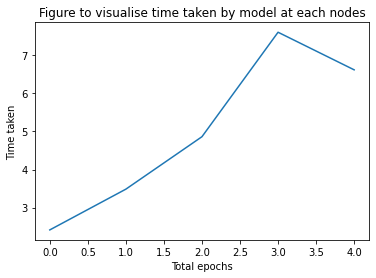

In [ ]:
import matplotlib.pyplot as plt
plt.plot(dataframe_100['time_spent'])
plt.ylabel('Time taken')
plt.xlabel('Total epochs')
plt.title('Figure to visualise time taken by model at each nodes')

#Number of layers = [1, 2, 3, 4, 5] and size of layers = 20

In [ ]:
hidden_layer = 20
time20=[]
for n_nodes in [1, 2, 3, 4, 5]:
    activation_layer=['tanh', 'relu']
    start = time.time()
    dataframe_20_5={}
    for i in activation_layer:
      print('******************************Started--{}*****************************'.format(i))
      dataframe_20_5[i]=pd.DataFrame(training(hidden_layer, n_nodes, i, data))
      time_spent = time.time() - start
      dataframe_20_5['time_spent_'+str(i)]=time_spent
      print('******************************Finished--{}*****************************'.format(i))
    time20.append(time_spent)
dataframe_20_5['time_spent']=time20

******************************Started--tanh*****************************
precision--0.9748877597722412 , recall--0.9748438008656292,f1score--0.9748045069725251
precision--0.9791803926943261 , recall--0.9790197770641152,f1score--0.9790515139851402
precision--0.9778242624235031 , recall--0.977820865220478,f1score--0.9777470498111179
precision--0.9775678019710501 , recall--0.9774231283089192,f1score--0.9773982062276867
precision--0.9790721097207891 , recall--0.9789196492527283,f1score--0.9789035870684419
******************************Finished--tanh*****************************
******************************Started--relu*****************************
precision--0.9858036756461592 , recall--0.9856889999642631,f1score--0.985689714398276
precision--0.9879858497478249 , recall--0.9877499891836787,f1score--0.9878218866200577
precision--0.9869061662098976 , recall--0.9866767136930156,f1score--0.9867341966719109
precision--0.9868460692617422 , recall--0.9865435873060188,f1score--0.9866329773265063

In [ ]:
dataframe_20_5

{'tanh':    precision    recall   f1score
 0   0.986456  0.986408  0.986367,
 'time_spent_tanh': 80.13939571380615,
 'relu':    precision    recall   f1score
 0   0.999566  0.999448  0.999503,
 'time_spent_relu': [34.65750479698181,
  47.68065857887268,
  99.63834190368652,
  102.91320085525513,
  240.64241409301758]}

Text(0.5, 1.0, 'Figure to visualise time taken by model at each nodes')

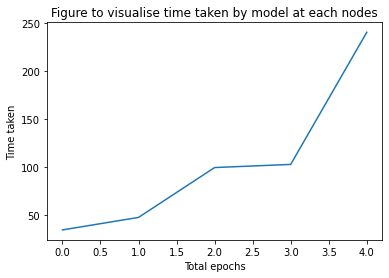

In [ ]:
plt.plot(dataframe_20_5['time_spent'])
plt.ylabel('Time taken')
plt.xlabel('Total epochs')
plt.title('Figure to visualise time taken by model at each nodes')

# Question 2 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
model1 = MLPClassifier(max_iter=1000, solver='lbfgs') #lr==0.001.
model2 = MLPClassifier(max_iter=1000, solver='lbfgs',learning_rate_init=0.5 ) #lr==0.5.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataX, y)

In [ ]:
model1.fit(X_train,y_train)
model2.fit(X_train,y_train)

MLPClassifier(learning_rate_init=0.5, max_iter=1000, solver='lbfgs')

In [ ]:
pred1=model1.predict(X_test)
pred2=model2.predict(X_test)

In [ ]:
print(metrics.accuracy_score(y_test, pred1))  #lr==0.001.

0.9273333333333333


In [ ]:
print(metrics.accuracy_score(y_test, pred2))  #lr==0.5.

0.928
